In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

# X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ili/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ili/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,-0.5,-0.333333,-0.500000,-0.500000
1,2002-01-08,-0.5,-0.333333,-0.266667,-0.480822
2,2002-01-15,-0.5,-0.333333,-0.033333,-0.461644
3,2002-01-22,-0.5,-0.333333,0.200000,-0.442466
4,2002-01-29,-0.5,-0.333333,0.433333,-0.423288
...,...,...,...,...,...
961,2020-06-02,-0.5,-0.333333,-0.466667,-0.080822
962,2020-06-09,-0.5,-0.333333,-0.233333,-0.061644
963,2020-06-16,-0.5,-0.333333,0.000000,-0.042466
964,2020-06-23,-0.5,-0.333333,0.233333,-0.023288


In [ ]:
Y_df

,ds,unique_id,y
0,2002-01-01,% WEIGHTED ILI,-0.421499
1,2002-01-01,%UNWEIGHTED ILI,-0.472442
2,2002-01-01,AGE 0-4,-0.981641
3,2002-01-01,AGE 5-24,-0.692621
4,2002-01-01,ILITOTAL,-0.819695
...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263
6758,2020-06-30,AGE 5-24,0.023051
6759,2020-06-30,ILITOTAL,0.651678
6760,2020-06-30,NUM. OF PROVIDERS,3.454565


In [ ]:
a=Y_df['unique_id'].unique()
a.size

7

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,% WEIGHTED ILI,-0.421499,-0.5,-0.333333,-0.500000,-0.50000
1,2002-01-01,%UNWEIGHTED ILI,-0.472442,-0.5,-0.333333,-0.500000,-0.50000
2,2002-01-01,AGE 0-4,-0.981641,-0.5,-0.333333,-0.500000,-0.50000
3,2002-01-01,AGE 5-24,-0.692621,-0.5,-0.333333,-0.500000,-0.50000
4,2002-01-01,ILITOTAL,-0.819695,-0.5,-0.333333,-0.500000,-0.50000
...,...,...,...,...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263,-0.5,-0.333333,0.466667,-0.00411
6758,2020-06-30,AGE 5-24,0.023051,-0.5,-0.333333,0.466667,-0.00411
6759,2020-06-30,ILITOTAL,0.651678,-0.5,-0.333333,0.466667,-0.00411
6760,2020-06-30,NUM. OF PROVIDERS,3.454565,-0.5,-0.333333,0.466667,-0.00411


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = range(len(filtered_df))
Y_df=filtered_df
Y_df

/tmp/ipykernel_11960/786084273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
/tmp/ipykernel_11960/786084273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


## Horizon 24

In [ ]:
Y_df=filtered_df

In [ ]:
Y_train_df = Y_df.iloc[:942,:]
Y_test_df = Y_df.iloc[942:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,942,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,943,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,944,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,945,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,946,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,947,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,948,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,949,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,950,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,951,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
horizon = 24
model = Informer(h=horizon,
                 input_size=24,
                 max_steps=200
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-20 03:28:13.633196: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 03:28:13.659749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=200` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,3.485004
OT,1,3.732747
OT,2,3.538452
OT,3,3.536779
OT,4,3.535952
OT,5,3.408792
OT,6,3.353136
OT,7,3.277494
OT,8,3.068720


<Axes: xlabel='ds'>

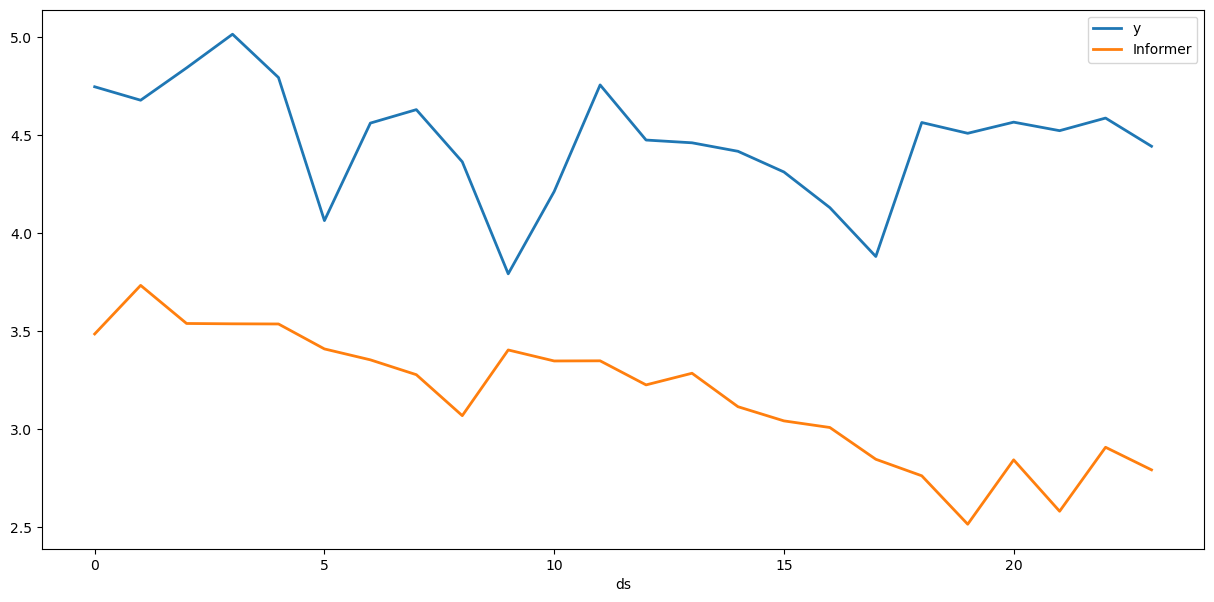

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,3.485004
1,3.732747
2,3.538452
3,3.536779
4,3.535952
5,3.408792
6,3.353136
7,3.277494
8,3.068720


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 1.305
Informer MSE: 1.843


## Horizon 36

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:930,:]
Y_test_df = Y_df.iloc[930:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,930,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,931,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,932,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,933,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,934,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,935,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,936,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,937,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,938,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,939,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
horizon = 36
model = Informer(h=horizon,
                 input_size=24,
                 max_steps=100
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,1.957055
OT,1,2.699591
OT,2,2.605600
OT,3,2.227663
OT,4,2.209836
OT,5,2.194169
OT,6,2.181809
OT,7,2.169101
OT,8,2.148747


<Axes: xlabel='ds'>

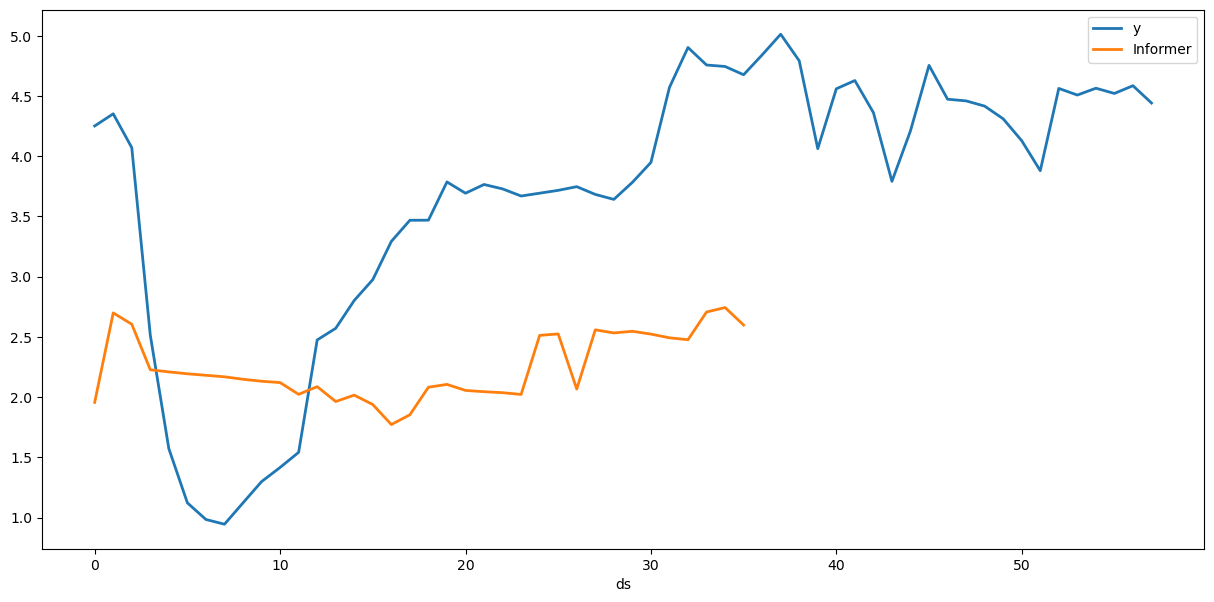

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,1.957055
1,2.699591
2,2.605600
3,2.227663
4,2.209836
5,2.194169
6,2.181809
7,2.169101
8,2.148747


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 1.338
Informer MSE: 2.075


## Horizon 48

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:918,:]
Y_test_df = Y_df.iloc[918:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,918,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,919,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,920,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,921,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,922,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,923,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,924,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,925,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,926,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,927,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
horizon = 48
model = Informer(h=horizon,
                 input_size=24,
                 max_steps=100
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,3.011454
OT,1,3.154526
OT,2,2.574087
OT,3,2.348919
OT,4,2.246804
OT,5,2.304831
OT,6,2.240105
OT,7,2.301073
OT,8,2.297711


<Axes: xlabel='ds'>

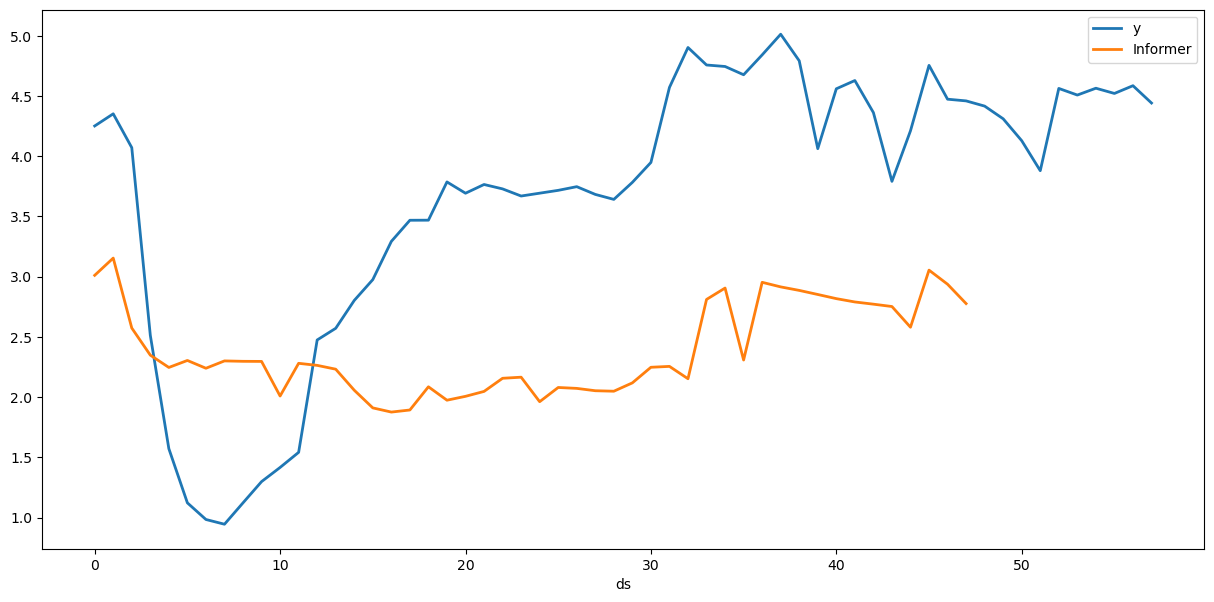

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,3.011454
1,3.154526
2,2.574087
3,2.348919
4,2.246804
5,2.304831
6,2.240105
7,2.301073
8,2.297711


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 1.454
Informer MSE: 2.389


## Horizon 60

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:908,:]
Y_test_df = Y_df.iloc[908:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,908,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,909,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,910,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,911,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,912,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,913,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,914,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,915,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,916,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,917,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
horizon = 60
model = Informer(h=horizon,
                 input_size=24,
                 max_steps=110
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=110` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,2.902680
OT,1,3.073375
OT,2,2.906556
OT,3,3.141251
OT,4,3.094731
OT,5,3.093415
OT,6,2.325185
OT,7,2.196419
OT,8,2.120821


<Axes: xlabel='ds'>

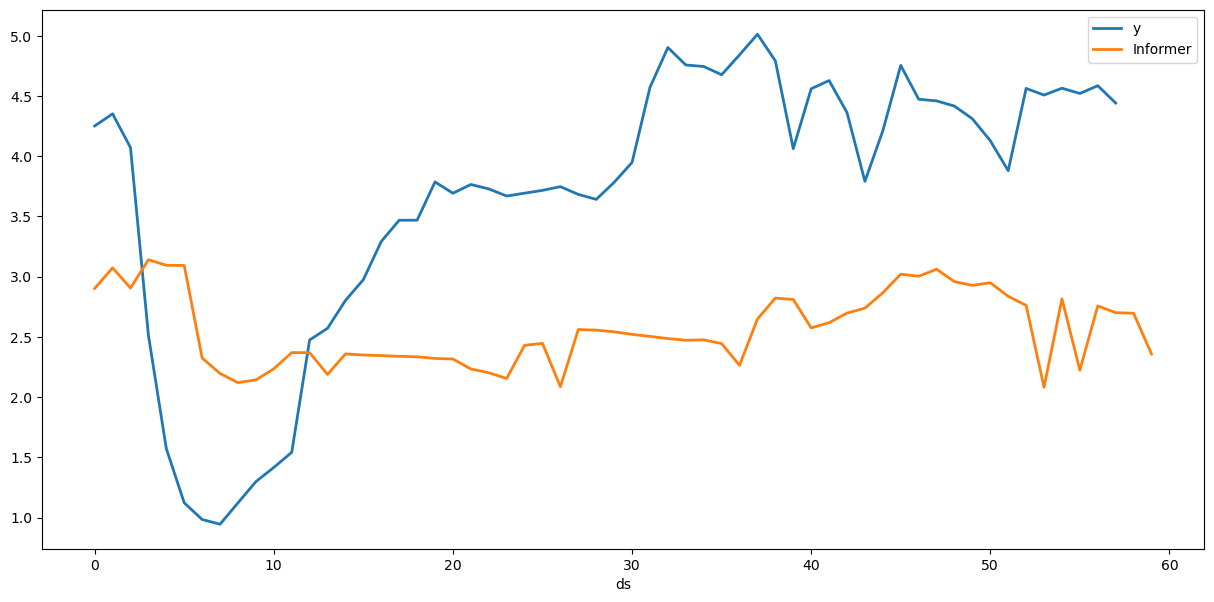

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,2.902680
1,3.073375
2,2.906556
3,3.141251
4,3.094731
5,3.093415
6,2.325185
7,2.196419
8,2.120821


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 1.452
Informer MSE: 2.401
